In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
data.head(100)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
95,None,280.00,0.0,0.0,75,Clouds,broken clouds,2012-10-06 15:00:00,5153
96,None,279.06,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 16:00:00,5024
97,None,278.91,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 17:00:00,4779
98,None,278.39,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 18:00:00,4362


In [4]:
data.isnull().sum()
d1=pd.DataFrame(data)

In [5]:
d1["date_time"].drop_duplicates(keep = False, inplace = True)
from sklearn.preprocessing import OrdinalEncoder
d1[["rain_1h"]]=OrdinalEncoder().fit_transform(d1[["rain_1h"]])
d1[["snow_1h"]]=OrdinalEncoder().fit_transform(d1[["snow_1h"]])
d1[["weather_main"]]=OrdinalEncoder().fit_transform(d1[["weather_main"]])
d1[["weather_description"]]=OrdinalEncoder().fit_transform(d1[["weather_description"]])
d1[["weather_main"]]=OrdinalEncoder().fit_transform(d1[["weather_main"]])
d1['date_time'] = pd.to_datetime(d1['date_time'])
d1['hour']=d1['date_time'].dt.hour
d1.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,1.0,24.0,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,1.0,2.0,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,1.0,19.0,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,1.0,19.0,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,1.0,2.0,2012-10-02 13:00:00,4918,13
5,None,291.72,0.0,0.0,1,0.0,27.0,2012-10-02 14:00:00,5181,14
6,None,293.17,0.0,0.0,1,0.0,27.0,2012-10-02 15:00:00,5584,15
7,None,293.86,0.0,0.0,1,0.0,27.0,2012-10-02 16:00:00,6015,16
8,None,294.14,0.0,0.0,20,1.0,4.0,2012-10-02 17:00:00,5791,17
9,None,293.10,0.0,0.0,20,1.0,4.0,2012-10-02 18:00:00,4770,18


In [6]:
data["weather_description"].unique()
data["weather_main"].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [7]:
from sklearn.preprocessing import OneHotEncoder
d1["holiday"].replace(["None", 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'],[0,1,1,1,1,1,1,1,1,1,1,1],inplace=True)
d1.head(10)
        

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,0,288.28,0.0,0.0,40,1.0,24.0,2012-10-02 09:00:00,5545,9
1,0,289.36,0.0,0.0,75,1.0,2.0,2012-10-02 10:00:00,4516,10
2,0,289.58,0.0,0.0,90,1.0,19.0,2012-10-02 11:00:00,4767,11
3,0,290.13,0.0,0.0,90,1.0,19.0,2012-10-02 12:00:00,5026,12
4,0,291.14,0.0,0.0,75,1.0,2.0,2012-10-02 13:00:00,4918,13
5,0,291.72,0.0,0.0,1,0.0,27.0,2012-10-02 14:00:00,5181,14
6,0,293.17,0.0,0.0,1,0.0,27.0,2012-10-02 15:00:00,5584,15
7,0,293.86,0.0,0.0,1,0.0,27.0,2012-10-02 16:00:00,6015,16
8,0,294.14,0.0,0.0,20,1.0,4.0,2012-10-02 17:00:00,5791,17
9,0,293.10,0.0,0.0,20,1.0,4.0,2012-10-02 18:00:00,4770,18


In [8]:
corr_matrix=d1.corr()
corr_matrix["traffic_volume"].sort_values(ascending=False)

traffic_volume         1.000000
hour                   0.352401
temp                   0.130299
clouds_all             0.067054
snow_1h               -0.000017
rain_1h               -0.015472
weather_main          -0.040151
holiday               -0.042897
weather_description   -0.067507
Name: traffic_volume, dtype: float64

In [9]:
d1['date_time'] = pd.to_datetime(d1['date_time'])


In [10]:
import datetime
from datetime import timedelta
test_cutoff_date = d1['date_time'].max() - timedelta(days=200)
val_cutoff_date = test_cutoff_date - timedelta(days=200)

df_test = d1[d1['date_time'] > test_cutoff_date]
df_val = d1[(d1['date_time'] > val_cutoff_date) & (d1['date_time'] <= test_cutoff_date)]
df_train = d1[d1['date_time'] <= val_cutoff_date]

In [15]:
df_train.drop_duplicates(subset='date_time',keep = False, inplace = True)
df_test.drop_duplicates(subset='date_time',keep = False, inplace = True)
df_val.drop_duplicates(subset='date_time',keep = False, inplace = True)
np.shape(df_train['date_time'])

<ipython-input-15-b951df454491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop_duplicates(subset='date_time',keep = False, inplace = True)
<ipython-input-15-b951df454491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop_duplicates(subset='date_time',keep = False, inplace = True)
<ipython-input-15-b951df454491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop_duplicates(subset='date_time',keep = 

(26996,)

In [9]:
df_val.head(10)

NameError: name 'df_val' is not defined

In [10]:
from sklearn.preprocessing import StandardScaler

d1_training=d1.drop(['snow_1h','rain_1h','date_time','hour'],axis=1)
df_training_scaled=StandardScaler().fit(d1_training).transform(d1_training) 

d1_training2=d1.drop(['snow_1h','rain_1h','date_time'],axis=1)
df_training_scaled2=StandardScaler().fit(d1_training2).transform(d1_training2) 

In [11]:
d1_training.head(10)

,holiday,temp,clouds_all,weather_main,weather_description,traffic_volume
0,0,288.28,40,1.0,24.0,5545
1,0,289.36,75,1.0,2.0,4516
2,0,289.58,90,1.0,19.0,4767
3,0,290.13,90,1.0,19.0,5026
4,0,291.14,75,1.0,2.0,4918
5,0,291.72,1,0.0,27.0,5181
6,0,293.17,1,0.0,27.0,5584
7,0,293.86,1,0.0,27.0,6015
8,0,294.14,20,1.0,4.0,5791
9,0,293.10,20,1.0,4.0,4770


In [12]:
trainX=[]
trainY=[]

trainX2=[]
trainY2=[]

n_future=1
n_past=14

for i in range(n_past,len(df_training_scaled)-n_future+1):
    trainX.append(df_training_scaled[i-n_past:i,0:d1_training.shape[1]])
    trainY.append(df_training_scaled[i+n_future-1:i+n_future,5])
    

for i in range(n_past,len(df_training_scaled2)-n_future+1):
    trainX2.append(df_training_scaled2[i-n_past:i,0:d1_training2.shape[1]])
    trainY2.append(df_training_scaled2[i+n_future-1:i+n_future,5])
    
trainX,trainY=np.array(trainX),np.array(trainY)
trainX2,trainY2=np.array(trainX2),np.array(trainY2)

print(trainX.shape)
print(trainY.shape)

(48190, 14, 6)
(48190, 1)


In [13]:
trainY

array([[-1.15601573],
       [-1.38602921],
       [-1.47914189],
       ...,
       [-0.55405484],
       [-0.91090289],
       [-1.16054553]])

In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model=Sequential()
model.add(LSTM(64,activation="relu",input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(32,activation="relu",return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist=model.fit(trainX,trainY,epochs=20,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/20
678/678 [==============================] - 32s 33ms/step - loss: 0.3912 - val_loss: 0.0652
Epoch 2/20
678/678 [==============================] - 17s 25ms/step - loss: 0.1188 - val_loss: 0.0529
Epoch 3/20
678/678 [==============================] - 16s 24ms/step - loss: 0.1064 - val_loss: 0.0637
Epoch 4/20
678/678 [==============================] - 17s 24ms/step - loss: 0.1007 - val_loss: 0.0539
Epoch 5/20
678/678 [==============================] - 17s 25ms/step - loss: 0.0975 - val_loss: 0.0472
Epoch 6/20
678/678 [==============================] - 17s 25ms/step - loss: 0.0916 - val_loss: 0.0418
Epoch 7/20
678/678 [==============================] - 18s 26ms/step - loss: 0.0878 - val_loss: 0.0405
Epoch 8/20
678/678 [==============================] - 18s 26ms/step - loss: 0.0879 - val_loss: 0.0416
Epoch 9/20
678/678 [==============================] - 17s 26ms/step - loss: 0.0842 - val_loss: 0.0396 - loss: 0.0
Epoch 10/20
678/678 [==============================] - 19s 27ms/step -

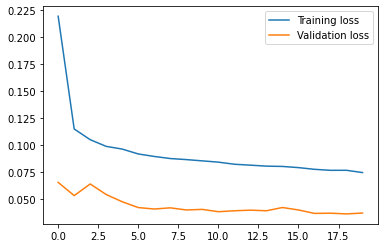

In [16]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.legend()

In [17]:
#model 2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(128, input_shape=(trainX2.shape[1],trainX2.shape[2]), return_sequences=True))
model2.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.LSTM(128, return_sequences=False))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

In [18]:
hist2=model2.fit(trainX2,trainY2,epochs=20,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/20
678/678 [==============================] - 83s 99ms/step - loss: 0.3064 - mean_absolute_error: 0.4035 - val_loss: 0.0572 - val_mean_absolute_error: 0.1781
Epoch 2/20
678/678 [==============================] - 54s 80ms/step - loss: 0.0859 - mean_absolute_error: 0.2034 - val_loss: 0.0432 - val_mean_absolute_error: 0.1443
Epoch 3/20
678/678 [==============================] - 58s 85ms/step - loss: 0.0760 - mean_absolute_error: 0.1880 - val_loss: 0.0377 - val_mean_absolute_error: 0.1336
Epoch 4/20
678/678 [==============================] - 54s 80ms/step - loss: 0.0716 - mean_absolute_error: 0.1801 - val_loss: 0.0356 - val_mean_absolute_error: 0.1296
Epoch 5/20
678/678 [==============================] - 58s 85ms/step - loss: 0.0660 - mean_absolute_error: 0.1721 - val_loss: 0.0377 - val_mean_absolute_error: 0.1370
Epoch 6/20
678/678 [==============================] - 54s 79ms/step - loss: 0.0660 - mean_absolute_error: 0.1716 - val_loss: 0.0375 - val_mean_absolute_error: 0.1369
Epoc

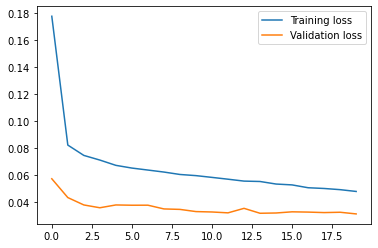

In [19]:
plt.plot(hist2.history['loss'], label='Training loss')
plt.plot(hist2.history['val_loss'], label='Validation loss')
plt.legend()

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 14, 128)           69632     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 14, 128)           131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [21]:
d1['Date']=d1['date_time'].dt.date
d1['hrs']=d1['date_time'].dt.hour
train_dates = pd.to_datetime(d1['Date'])
train_hours=pd.to_datetime(d1['hrs'])
print(train_dates.tail(15))

48189   2018-09-30
48190   2018-09-30
48191   2018-09-30
48192   2018-09-30
48193   2018-09-30
48194   2018-09-30
48195   2018-09-30
48196   2018-09-30
48197   2018-09-30
48198   2018-09-30
48199   2018-09-30
48200   2018-09-30
48201   2018-09-30
48202   2018-09-30
48203   2018-09-30
Name: Date, dtype: datetime64[ns]


In [50]:
##1970 kyu aa rha
n_future=60
forecast=pd.date_range(list(train_hours)[-1],periods=n_future,freq='1h').tolist()
print(forecast)

[Timestamp('1970-01-01 00:00:00.000000023', freq='H'), Timestamp('1970-01-01 01:00:00.000000023', freq='H'), Timestamp('1970-01-01 02:00:00.000000023', freq='H'), Timestamp('1970-01-01 03:00:00.000000023', freq='H'), Timestamp('1970-01-01 04:00:00.000000023', freq='H'), Timestamp('1970-01-01 05:00:00.000000023', freq='H'), Timestamp('1970-01-01 06:00:00.000000023', freq='H'), Timestamp('1970-01-01 07:00:00.000000023', freq='H'), Timestamp('1970-01-01 08:00:00.000000023', freq='H'), Timestamp('1970-01-01 09:00:00.000000023', freq='H'), Timestamp('1970-01-01 10:00:00.000000023', freq='H'), Timestamp('1970-01-01 11:00:00.000000023', freq='H'), Timestamp('1970-01-01 12:00:00.000000023', freq='H'), Timestamp('1970-01-01 13:00:00.000000023', freq='H'), Timestamp('1970-01-01 14:00:00.000000023', freq='H'), Timestamp('1970-01-01 15:00:00.000000023', freq='H'), Timestamp('1970-01-01 16:00:00.000000023', freq='H'), Timestamp('1970-01-01 17:00:00.000000023', freq='H'), Timestamp('1970-01-01 18:00

In [51]:
for time_i in forecast:
    print(time_i.hour)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11


In [52]:
pred=model.predict(trainX[-n_future:])
pred2=model2.predict(trainX2[-n_future:])

In [53]:
forecast_copies=np.repeat(pred,d1_training.shape[1],axis=-1)
y_pred=StandardScaler().fit(d1_training).inverse_transform(forecast_copies)[:,5]
forecast_copies2=np.repeat(pred2,d1_training2.shape[1],axis=-1)
y_pred2=StandardScaler().fit(d1_training2).inverse_transform(forecast_copies2)[:,5]

In [54]:
y_pred

array([5870.8105 , 6501.17   , 5723.5146 , 4440.986  , 3902.0718 ,
       3455.4673 , 3195.5166 , 2794.5078 , 2220.1978 , 2144.3052 ,
       1179.8057 ,  584.0598 ,  401.27563,  531.45386, 1002.5127 ,
       1789.9904 , 2517.6707 , 2867.15   , 3845.8357 , 4181.8945 ,
       4309.973  , 4547.057  , 4691.591  , 4664.092  , 4654.297  ,
       4517.5234 , 4654.1743 , 4751.716  , 4123.6094 , 3219.7708 ,
       3298.5728 , 2979.2283 , 2615.738  , 2088.8062 , 2704.4375 ,
       1131.1604 ,  523.407  ,  419.01074,  267.26196,  555.4287 ,
        922.80005, 1616.871  , 1743.009  , 2837.491  , 3490.6455 ,
       4160.1665 , 4286.308  , 4548.8433 , 4508.901  , 4367.2344 ,
       4401.1113 , 4258.1313 , 4249.5054 , 4226.435  , 3989.7742 ,
       3703.2634 , 3262.7742 , 2523.446  , 1974.3479 , 1042.5911 ],
      dtype=float32)

In [55]:
forecast_hours = []
for time_i in forecast:
    forecast_hours.append(time_i.hour)
    
df_forecast = pd.DataFrame({'Hour':np.array(forecast_hours), 'Open':y_pred})
df_forecast['Hour']=pd.to_datetime(df_forecast['Hour'])

forecast_hours2 = []
for time_i2 in forecast:
    forecast_hours2.append(time_i2.hour)
    
df_forecast2 = pd.DataFrame({'Hour':np.array(forecast_hours2), 'Open':y_pred2})
df_forecast2['Hour']=pd.to_datetime(df_forecast2['Hour'])

<ipython-input-56-0660ec89f808>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['hour']=pd.to_datetime(original['hour'])
C:\Users\nitis\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nitis\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

<AxesSubplot:xlabel='hour', ylabel='traffic_volume'>

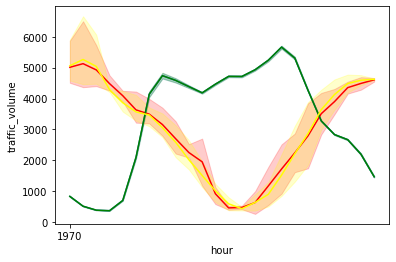

In [56]:
original = d1[['hour', 'traffic_volume']]
original['hour']=pd.to_datetime(original['hour'])


sns.lineplot(original['hour'], original['traffic_volume'])
sns.lineplot(df_forecast['Hour'], df_forecast['Open'],color="red")

original2 = d1[['hour', 'traffic_volume']]
original2['hour']=pd.to_datetime(original2['hour'])


sns.lineplot(original2['hour'], original2['traffic_volume'],color="green")
sns.lineplot(df_forecast2['Hour'], df_forecast2['Open'],color="yellow")